# Sentiment Analysis of Amazon Electronic Products Reviews<br> NLP (Natural Language Processing)

### 1. Importing Packages

In [2]:
#! pip install nltk
#! pip install wordcloud
#! pip install -U gensim
#! pip install tensorflow --user

In [828]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk  # the most famous python module for NLP techniques
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud # to express the words in a word cloud (words review visualization)

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

import nltk
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sohei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2. Importing Data

In [829]:
# Reading data from .csv file
#amazon_ProRev = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products - Copy.csv')
amazon_ProRev = pd.read_csv('DatafinitiElectronicsProductData.csv')

In [830]:
amazon_ProRev.head(5)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,manufacturerNumber,name,primaryCategories,reviews_dateSeen,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,1.1 pounds


### 3. Data Exploration

In [831]:
amazon_ProRev.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7294 non-null   object 
 1   asins                7294 non-null   object 
 2   brand                7294 non-null   object 
 3   categories           7294 non-null   object 
 4   colors               5279 non-null   object 
 5   dateAdded            7294 non-null   object 
 6   dateUpdated          7294 non-null   object 
 7   dimension            6089 non-null   object 
 8   manufacturerNumber   7294 non-null   object 
 9   name                 7294 non-null   object 
 10  primaryCategories    7294 non-null   object 
 11  reviews_dateSeen     7294 non-null   object 
 12  reviews_doRecommend  5904 non-null   object 
 13  reviews_numHelpful   5809 non-null   float64
 14  reviews_rating       7130 non-null   float64
 15  reviews_sourceURLs   7294 non-null   o

In [833]:
display(amazon_ProRev.describe().round(2))

,reviews_numHelpful,reviews_rating
count,5809.00,7130.00
mean,0.75,4.37
std,3.42,1.04
min,0.00,1.00
25%,0.00,4.00
50%,0.00,5.00
75%,0.00,5.00
max,128.00,5.00


### 4. Handling Missing Values

In [823]:
amazon_ProRev.isnull().any()

id                     False
asins                  False
brand                  False
categories             False
colors                  True
dateAdded              False
dateUpdated            False
dimension               True
manufacturerNumber     False
name                   False
primaryCategories      False
reviews_dateSeen       False
reviews_doRecommend     True
reviews_numHelpful      True
reviews_rating          True
reviews_sourceURLs     False
reviews_text            True
reviews_title           True
reviews_username       False
weight                 False
dtype: bool

In [826]:
amazon_ProRev.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2015
dateAdded                 0
dateUpdated               0
dimension              1205
manufacturerNumber        0
name                      0
primaryCategories         0
reviews_dateSeen          0
reviews_doRecommend    1390
reviews_numHelpful     1485
reviews_rating          164
reviews_sourceURLs        0
reviews_text              5
reviews_title             4
reviews_username          0
weight                    0
dtype: int64

In [817]:
# Replacing reviews_numHelpful missing values with zero value
amazon_ProRev['reviews_numHelpful'] = amazon_ProRev['reviews_numHelpful'].fillna(0)

In [818]:
# Replacing reviews_rating missing values with value of 3 (netural rating)
amazon_ProRev['reviews_rating'] = amazon_ProRev['reviews_rating'].fillna(3)

In [755]:
# Replacing colors missing values with 'not selected' text
#amazon_ProRev['colors'] = amazon_ProRev['colors'].fillna('not selected')

In [756]:
amazon_ProRev.isna().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2015
dateAdded                 0
dateUpdated               0
dimension              1205
manufacturerNumber        0
name                      0
primaryCategories         0
reviews_dateSeen          0
reviews_doRecommend    1390
reviews_numHelpful        0
reviews_rating            0
reviews_sourceURLs        0
reviews_text              5
reviews_title             4
reviews_username          0
weight                    0
dtype: int64

In [757]:
# Dropping Null values of dimension, reviews_date, reviews_doRecommend, reviews_text, reviews_title columns
amazon_ProRev.dropna(how='any', inplace=True)

In [758]:
amazon_ProRev.isnull().sum()

id                     0
asins                  0
brand                  0
categories             0
colors                 0
dateAdded              0
dateUpdated            0
dimension              0
manufacturerNumber     0
name                   0
primaryCategories      0
reviews_dateSeen       0
reviews_doRecommend    0
reviews_numHelpful     0
reviews_rating         0
reviews_sourceURLs     0
reviews_text           0
reviews_title          0
reviews_username       0
weight                 0
dtype: int64

In [759]:
#amazon_ProRev.info() 

In [760]:
#print(amazon_ProRev.loc[amazon_ProRev.reviews_title.isnull()])

### 5. Data Visualization

Performing some basic exploratory data analysis to analyze the frequency of the words in each of the reviews. Accessing the text and applying a lambda function to split the text by the spaces of the reviews and getting the words followed by counting the words per review. Drawing the words into a histogram.

Let's look at the distribution of the number of words per review.

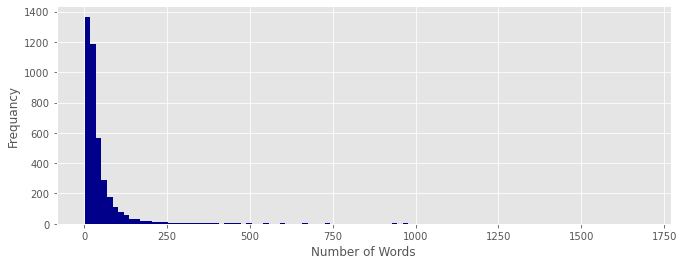

In [762]:
# Getting the number of words by splitting them by a space
numof_words_per_review = amazon_ProRev.reviews_text.apply(lambda x: len(x.split(" ")))
numof_words_per_review.hist(bins=100, color='darkblue', figsize=(11, 4))
plt.xlabel('Number of Words')
plt.ylabel('Frequancy')
plt.show() 

In [763]:
#print(numof_words_per_review)

In [764]:
print('Average words:', numof_words_per_review.mean())
print('Skewness:', numof_words_per_review.skew())

Average words: 46.53851870200644
Skewness: 8.246140800837248


The graph is positively skewed and shows almost all the reviews have less than 200 words that is very important for us because, to analyze the reviews we need to know how this dimensional space is looking like (200 words per review as maximum and 30 words as average review).

Let's also look at the distribution of ratings (scores).

In [765]:
# calculating the rating percentage
rating_percentVal = 100* amazon_ProRev['reviews_rating'].value_counts()/len(amazon_ProRev)
rating_percentVal

5.0    62.843696
4.0    25.613079
3.0     5.771613
1.0     3.344067
2.0     2.427545
Name: reviews_rating, dtype: float64

Looking at the results, 62.84% of reviews have 5 stars, 25.61% have 4 stars, 5.77% have 3 stars, 3.34% have 1 stars and 2.42% have 2 star.

To have better visualization these percentages were shown in the bar graph.

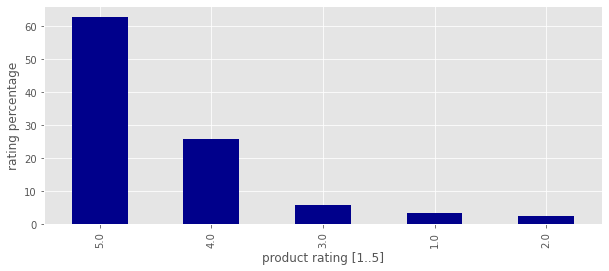

In [766]:
# scores distribution
rating_percentVal.plot.bar(figsize=(10,4), color='darkblue')
plt.xlabel('product rating [1..5]')
plt.ylabel('rating percentage')
plt.show()

The distribution is quite skewed, with a large number of 5s and very few 3s, 2s, and 1s.

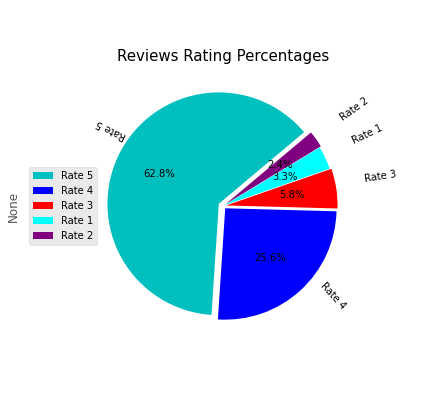

In [815]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

labels = 'Rate 5', 'Rate 4', 'Rate 3', 'Rate 1', 'Rate 2'
explode = [0,0,0.1,0,0] # To slice the perticuler section
colors = ["c", 'b','r','aqua','purple'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart

amazon_ProRev.value_counts('reviews_rating').plot.pie(autopct='%0.1f%%', fontsize=10, shadow=False, radius = 0.7, 
                                                      colors =colors, explode=(0.03, 0.02, 0.02, 0.01, 0.02),startangle = 400  
                                                       ,center=(2, 3), labels=labels, labeldistance=1.25, rotatelabels=True) 

plt.title('Reviews Rating Percentages', fontsize=15, loc='center', y=0.85)
plt.legend(loc="center left")

plt.tight_layout()
plt.show() 

### 6. Data Visualization using Word Cloud

Word cloud lets us visualize what the distribution of the text looks like. If the frequency of the word in all the reviews is high, the word appears large and if it's low the word appears small.

Visualization is crucial for numerical data and also important for the text data. However, the text does not lend itself to histogram charts or scatterplots, as numerical data does. In such cases, the word clouds are a common and very useful tool to appreciate the text distribution.

To make a word cloud of the string values of the text data, we are going to import the **WordCloud** package (install it with pip install wordcloud) and join all the text with the **.join()** method.

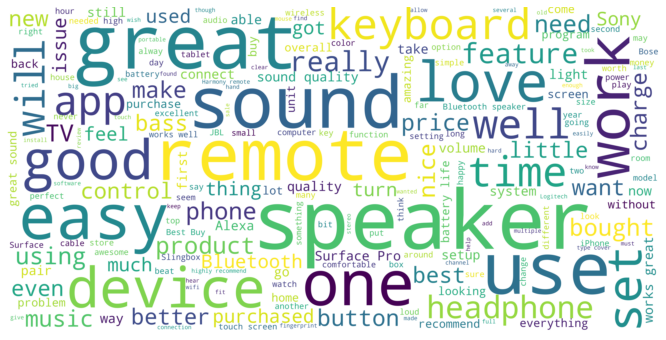

In [669]:
# Joining all the reviews from dataset in a general string 
text_word_cloud = ''.join(amazon_ProRev['reviews_text'])

# generating word cloud using WordCloud package and generate() function 
wc = WordCloud(max_font_size=100, # Maximum font size for the largest word
               max_words=200, # Maximum number of words
               background_color="white", # background color of the word cloud image
               scale=10, # Scaling between computation and drawing
               width=800, # Width of the canvas
               height=400 # Height of the canvas 
              ).generate(text_word_cloud)

plt.figure()
plt.imshow(wc, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

As a distribution of the text in a visualization way, a word cloud displays the words in different sizes, indicating the frequency of the each word in the text. Looking at the word cloud, it shows that the reviews are related to the electronic products such as: "Speakers", "Headphones", "Keyboard", etc. Some words are related to the customers experiences, such as: "good", "love", "best", "great" and some are not desired ones like, "much" (determiner) and "something" (adverb), which might not give us any insights about the reviews. So, we need to use the techniques to delete or drop these words.


In [670]:
# Splitting text into word
reviews = amazon_ProRev['reviews_text'].str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
#print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

#print(frequency_dist.keys())
#print(frequency_dist.values())

['.',
 'the',
 'to',
 'and',
 ',',
 'I',
 'a',
 'it',
 'is',
 'for',
 'of',
 'with',
 'my',
 'this',
 'you',
 'that',
 'on',
 'have',
 'in',
 '!',
 'The',
 'sound',
 'but',
 'was',
 'great',
 'not',
 'speaker',
 'as',
 'remote',
 "n't",
 'use',
 'are',
 'It',
 'can',
 'up',
 'one',
 'very',
 "'s",
 'be',
 'This',
 'all',
 'at',
 'or',
 'so',
 'good',
 'easy',
 'has',
 'from',
 'your',
 'when']

### 7. Data Prepration<br>

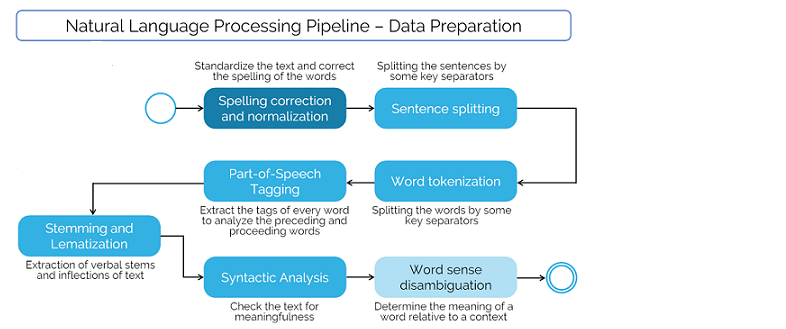

The most important step to analyze the data, is to clean and prepare the dataset. A good model is not only dependent on the algorithm, but on a clean dataset mostly. There are many tactics in Text Data Processing, such as:
- Remove non-alphanumeric characters, except for white space.
- Convert all characters to lowercase, in order to treat the words such as “Hello”, “hello”, “HELLO”, “HEllO” all the same.
- Consider Tokenization, Stemming, and lemmatization.
- and so on.<br>

In addition to a clean dataset, since machine learning models always take numeric values as input, we need to represent text as a vector of “number” to satisfy the requirement.

In order to have a sentiment analysis we start with performing data preparation. 

### 8. Standardization the Ratings

For the purposes of sentiment analysis, we will convert all of the ratings into binary values using the following rule:

- Ratings of 4 or 5 will get mapped to 1 and will be related to positive reviews.
- Ratings of 1 or 2 will get mapped to 0 and will be related to negative reviews.
- Ratings of 3 will get removed since they will represent neutral reviews.

We can achieve these mappings by using **.where()** function which filters the rating values to 0 and 1. If the score is greater than 3 it will represent as 1, otherwise represent as 0.

In [671]:
# Mapping the ratings
amazon_ProRev['Sentiment_rating'] = np.where(amazon_ProRev.reviews_rating > 3,1,0)

# Removing neutral reviews. 
# We don't consider the 3 ratings which represents the neutral reviews, only positive(1) and negetive(0) will be analyzed.
amazon_ProRev = amazon_ProRev[amazon_ProRev.reviews_rating != 3]

# Printing the counts of each class
amazon_ProRev['Sentiment_rating'].value_counts()

1    3571
0     233
Name: Sentiment_rating, dtype: int64

Looking at the results, showing that most of the reviews are positive.

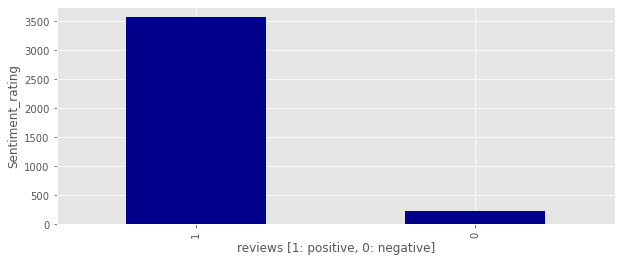

In [672]:
# ploting the distribution of the number of positive and negative reviews
amazon_ProRev.Sentiment_rating.value_counts().plot.bar(figsize=(10,4), color='darkblue')
plt.xlabel('reviews [1: positive, 0: negative]')
plt.ylabel('Sentiment_rating')
plt.show()


There is a class imbalance that we are going to handle by defining robust metrics as the f1 score.

### 9. Data Pre-processing


Text preprocessing and normalization is crucial before building a proper NLP model. Some of the important steps are:

- Converting words to lower/upper case
- Removing special characters
- Removing stopwords and high/low-frequency words
- Stemming/lemmatization

**1. Converting words to lower/upper case**

We start by converting all of the words into a consistent case format, say lowercase by using **.lower()** function.

In [673]:
# Converting text reviews to lowercase using lower() function
amazon_ProRev['lowercase_text_reviews'] = amazon_ProRev['reviews_text'].str.lower()

print(amazon_ProRev['lowercase_text_reviews'])
#print(amazon_ProRev['lowercase_text_reviews'][6])

0       this keyboard is very easy to type on, but the...
1       it's thin and light. i can type pretty easily ...
2       i love the new design the keys are spaced well...
3       attached easily and firmly. has a nice feel. a...
4       our original keyboard was okay, but did not ha...
                              ...                        
7287    best feature is being rechargableworks nice, t...
7288    i'm still trying to learn all the features of ...
7289     great sound system would definitely recommend...
7290    i hated my cable company bulky remote control ...
7291    we were forced to add a cable box as charter c...
Name: lowercase_text_reviews, Length: 3804, dtype: object


In the following code we analyze the number of unique words that are found in reviews. This process of extracting individual words is called word tokenization, and can be run using the **.word_tokenize()** function from nltk package.

In [674]:
from nltk import word_tokenize

# Word tokenization example:
word_tokenize("I love it. It does so much and is so easy to use. I use it mostly for music and questions. :D")

['I',
 'love',
 'it',
 '.',
 'It',
 'does',
 'so',
 'much',
 'and',
 'is',
 'so',
 'easy',
 'to',
 'use',
 '.',
 'I',
 'use',
 'it',
 'mostly',
 'for',
 'music',
 'and',
 'questions',
 '.',
 ':',
 'D']

In [675]:
# Number of tokens before converting reviews to lowercase
token_lists = [word_tokenize(each) for each in amazon_ProRev['reviews_text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# Number of tokens after converting reviews to lowercase
token_lists_lower = [word_tokenize(each) for each in amazon_ProRev['lowercase_text_reviews']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  9963
Number of unique tokens now:  8378


The result shows that the number of tokens has gone down by ~16% by converting the tokens to the lowercase from normalizing the corpus. So we reduced the bias by applying the lowercase transformation to the words and expressed all the words in a standard and normalized way (lowercase).

**2. Removing special characters**

After we transformed the text into lowercase we remove some special characters that aren't going to give us insights. 

The following gives a list of all the special characters in our dataset by applying **.isalnum()** function which checks whether a string contains only letters or numbers or both. If all characters are alphanumeric, isalnum() returns the value True ; otherwise, the method returns the value False

In [676]:
# Selecting non alpha numeric charactes that are not spaces using isalnum() function - 
spl_chars = amazon_ProRev['lowercase_text_reviews'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])
#print(spl_chars)

# Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]
 
# Unique special characters - Create a set containing special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 ']',
 '~',
 '®',
 '°',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '™'}

Now we remove these special characters from the reviews by applying a regular expression and using **.replace()** function.

Removing special characters is a subjective call, especially in cases like this one. People often use special characters to express their emotions and might leave a review like 'This product is the worst!!!', while a positive review could be like 'This product is the best. Loved it!'. Here, the presence of exclamation marks clearly indicates something about the underlying sentiment, so removing them may well not be a good idea.

On the other hand, removing non-emotionally charged punctuation such as commas, periods, and semicolons is likely safe.

In [677]:
# removing the special characters 
review_copy = amazon_ProRev['lowercase_text_reviews'].copy()
amazon_ProRev['lowercase_text_reviews'] = amazon_ProRev['lowercase_text_reviews'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In the regular expression [^A-Za-z0-9 ]+:

- [ ]: match any character inside the list defined by the square brackets, including the space character ' '
- ^: start of the line
- A-Z: accept english upper case characters from A to Z
- a-z: accept english lower case characters from a to z
- 0-9: accept single number characters from 0 to 9


We can see how our reviews change after removing these characters.

In [678]:
print("-- Old Review --")
#print(review_copy.values[2])
print(review_copy[4])
print("\n-- New Review --")
print(amazon_ProRev['lowercase_text_reviews'][4])

-- Old Review --
our original keyboard was okay, but did not have a laptop feel to it, a bit floppy. the new one has a solid feel to it and the keys are more laptop-like.

-- New Review --
our original keyboard was okay  but did not have a laptop feel to it  a bit floppy  the new one has a solid feel to it and the keys are more laptop like 


As we can see in previous reviews we have all special characters and in the new reviews all were dropped and replaced with space, so the new reviews are going to be the reviews to be analyzed.

In [679]:
#token_lists = [word_tokenize(each) for each in amazon_ProRev['reviews_text']]
token_lists = [word_tokenize(each) for each in review_copy]

tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in amazon_ProRev['lowercase_text_reviews']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens then:  8378
Number of unique tokens now:  7260


So, the number of tokens dropped to 7260 after removing the special characters from the reviews.

**3. Stopwords and high/low frequency words**<br>

Stopwords naturally occur very frequently in the English language without adding any specific insights and it makes sense to remove them. Here are the list of languages are available in the nltk package.

In [680]:
from nltk.corpus import stopwords

print('All Languages in NLTK: \n')
print(stopwords.fileids())

All Languages in NLTK: 

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


Some languages are not included in this package, but there are other packages like inltk to process reviews in different languages. 

Let's now review the list of English stopwords. These stopwords are not giving us much insight about the review, so we might want to discard these words.

In [681]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now we remove these stopwords from the reviews. To do this, we tokenize the reviews and add the tokens into seperate lists (stopword and none-stopword).

In [682]:
# seperating stopwords and non-stopwords from the reviews
stop_words = set(eng_stop_words)
del_stop_words = []
stopword = []

# using review number 0 as an example
sentence = amazon_ProRev['lowercase_text_reviews'][1] 

# tokenize a sentence to the seperate tokens
words = nltk.word_tokenize(sentence)

# Adding words into different array, stopwords and without stopwords(del_stop_words)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        del_stop_words.append(word)
        
print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', del_stop_words)

-- Original Sentence --
 it s thin and light  i can type pretty easily on it 

-- Stopwords in the sentence --
 ['it', 's', 'and', 'i', 'can', 'on', 'it']

-- Non-stopwords in the sentence --
 ['thin', 'light', 'type', 'pretty', 'easily']


Now, we use reviews without stopwords for analyzing the words since they give us the insight. To delete the stopwords we define **.remove_stopwords()** function to return a list of non-stopwords of all the reviews.

In [683]:
def remove_stopwords(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

amazon_ProRev['withoutstop_reviews_text'] = amazon_ProRev['lowercase_text_reviews'].apply(lambda row: remove_stopwords(stop_words, row))
amazon_ProRev[['lowercase_text_reviews','withoutstop_reviews_text']]

,lowercase_text_reviews,withoutstop_reviews_text
0,this keyboard is very easy to type on but the...,"[keyboard, easy, type, fingerprint, reader, be..."
1,it s thin and light i can type pretty easily ...,"[thin, light, type, pretty, easily]"
2,i love the new design the keys are spaced well...,"[love, new, design, keys, spaced, well, mis, t..."
3,attached easily and firmly has a nice feel a...,"[attached, easily, firmly, nice, feel, must, s..."
4,our original keyboard was okay but did not ha...,"[original, keyboard, okay, laptop, feel, bit, ..."
...,...,...
7287,best feature is being rechargableworks nice t...,"[best, feature, rechargableworks, nice, touch,..."
7288,i m still trying to learn all the features of ...,"[still, trying, learn, features, controller, t..."
7289,great sound system would definitely recommend,"[great, sound, system, would, definitely, reco..."
7290,i hated my cable company bulky remote control ...,"[hated, cable, company, bulky, remote, control..."


**4. Stemming & lemmatization**<br>

Now we are ready for the last part of our pre-processing - stemming & lemmatization.

**Stemming** is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language. It works by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found.

**Lemmatization** takes into consideration the morphological analysis of the words. So lemmatization considers the grammar of the word and tries to find the root word instead of just getting to the root word by brute force methods.

In [684]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common Stemmers
from nltk.stem import WordNetLemmatizer # Common Lemmatizer
nltk.download('wordnet') #The WordNet is a part of Python's Natural Language Toolkit. 
                         #It is a large word database of English Nouns, Adjectives, Adverbs and Verbs.
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [685]:
# defining stemSentence() function to do data stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
#df['stemmed'] = df['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) 
amazon_ProRev['stemmed_reviews_text'] = amazon_ProRev['withoutstop_reviews_text'].apply(lambda x: [stemSentence(y) for y in x])
amazon_ProRev[['withoutstop_reviews_text','stemmed_reviews_text']]

,withoutstop_reviews_text,stemmed_reviews_text
0,"[keyboard, easy, type, fingerprint, reader, be...","[keyboard , easi , type , fingerprint , reader..."
1,"[thin, light, type, pretty, easily]","[thin , light , type , pretti , easili ]"
2,"[love, new, design, keys, spaced, well, mis, t...","[love , new , design , key , space , well , mi..."
3,"[attached, easily, firmly, nice, feel, must, s...","[attach , easili , firmli , nice , feel , must..."
4,"[original, keyboard, okay, laptop, feel, bit, ...","[origin , keyboard , okay , laptop , feel , bi..."
...,...,...
7287,"[best, feature, rechargableworks, nice, touch,...","[best , featur , rechargablework , nice , touc..."
7288,"[still, trying, learn, features, controller, t...","[still , tri , learn , featur , control , thin..."
7289,"[great, sound, system, would, definitely, reco...","[great , sound , system , would , definit , re..."
7290,"[hated, cable, company, bulky, remote, control...","[hate , cabl , compani , bulki , remot , contr..."


In [686]:
# defining lemmSentence() function to do data lemmatization 
def lemmSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

amazon_ProRev['lemma_reviews_text'] = amazon_ProRev['withoutstop_reviews_text'].apply(lambda x: [lemmSentence(y) for y in x])
amazon_ProRev[['withoutstop_reviews_text','lemma_reviews_text']]

,withoutstop_reviews_text,lemma_reviews_text
0,"[keyboard, easy, type, fingerprint, reader, be...","[keyboard , easy , type , fingerprint , reader..."
1,"[thin, light, type, pretty, easily]","[thin , light , type , pretty , easily ]"
2,"[love, new, design, keys, spaced, well, mis, t...","[love , new , design , key , space , well , mi..."
3,"[attached, easily, firmly, nice, feel, must, s...","[attach , easily , firmly , nice , feel , must..."
4,"[original, keyboard, okay, laptop, feel, bit, ...","[original , keyboard , okay , laptop , feel , ..."
...,...,...
7287,"[best, feature, rechargableworks, nice, touch,...","[best , feature , rechargableworks , nice , to..."
7288,"[still, trying, learn, features, controller, t...","[still , try , learn , feature , controller , ..."
7289,"[great, sound, system, would, definitely, reco...","[great , sound , system , would , definitely ,..."
7290,"[hated, cable, company, bulky, remote, control...","[hat , cable , company , bulky , remote , cont..."


Once we have applied these four-step exploratory data analysis procedures, including, transforme the reviews to the lowercase, deleted the special characters, removed the stopwords and stemmed and lammetized the text we can go to the modeling stage.

### 10. Building a Machine Learning Model 

We have already done the exploratory data analysis and now we can go to the modeling stage. This is a supervised learning analysis as we have the target variable and we are going to apply some classification models into this target variable.

Now we have cleaned-up versions of two very important pieces of data – the actual review text and its corresponding sentiment rating.

In [687]:
amazon_ProRev[['reviews_text','reviews_rating','Sentiment_rating']].head(5)

,reviews_text,reviews_rating,Sentiment_rating
0,"This keyboard is very easy to type on, but the...",5.0,1
1,It's thin and light. I can type pretty easily ...,4.0,1
2,I love the new design the keys are spaced well...,4.0,1
3,Attached easily and firmly. Has a nice feel. A...,5.0,1
4,"Our original keyboard was okay, but did not ha...",5.0,1


To have additional insights of the reviews we can analyze words together by using n-grams to create features.
For this reason, it is often prudent to start by extracting as much value out of 1-grams as possible, before working our way up to more complex structures.
ngrams are going to give you more context, but also are going to give more computational expense.

Let's look at an example of extracting n-grams over a proposed sentence.

In [688]:
# n-gram modeling example:
from nltk import ngrams

sentence = 'I am loving my new Kindle! I have wanted one for a while and finally bought.'

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)), '\n')

1-grams:
 [('I',), ('am',), ('loving',), ('my',), ('new',), ('Kindle!',), ('I',), ('have',), ('wanted',), ('one',), ('for',), ('a',), ('while',), ('and',), ('finally',), ('bought.',)] 

2-grams:
 [('I', 'am'), ('am', 'loving'), ('loving', 'my'), ('my', 'new'), ('new', 'Kindle!'), ('Kindle!', 'I'), ('I', 'have'), ('have', 'wanted'), ('wanted', 'one'), ('one', 'for'), ('for', 'a'), ('a', 'while'), ('while', 'and'), ('and', 'finally'), ('finally', 'bought.')] 

3-grams:
 [('I', 'am', 'loving'), ('am', 'loving', 'my'), ('loving', 'my', 'new'), ('my', 'new', 'Kindle!'), ('new', 'Kindle!', 'I'), ('Kindle!', 'I', 'have'), ('I', 'have', 'wanted'), ('have', 'wanted', 'one'), ('wanted', 'one', 'for'), ('one', 'for', 'a'), ('for', 'a', 'while'), ('a', 'while', 'and'), ('while', 'and', 'finally'), ('and', 'finally', 'bought.')] 

4-grams:
 [('I', 'am', 'loving', 'my'), ('am', 'loving', 'my', 'new'), ('loving', 'my', 'new', 'Kindle!'), ('my', 'new', 'Kindle!', 'I'), ('new', 'Kindle!', 'I', 'have'),

### 10.1 Bag of Words Model 

The bag-of-words procedure falls under a broader category of techniques known as **count-based representations**. These are techniques to analyze documents by indicating how frequently certain types of structures occur throughout.

Here we create a word-document co-occurrence matrix for our set of reviews using the **CountVectorizer** class that automatically accounts for certain preprocessing steps like removing stopwords, stemming, creating n-grams, and word tokenization.

In [689]:
amazon_ProRev['lowercase_text_reviews'][10]

'a must have accessory for the surface pro computer'

To create word-document matrix and convert the reviews to a matrix of token counts **vec.fit_transform()** function was used.

In [690]:
# creating word-document matrix
from sklearn.feature_extraction.text import CountVectorizer

# converting reviews to a matrix of token counts
vec = CountVectorizer()
X = vec.fit_transform(amazon_ProRev['lowercase_text_reviews'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,00,000,0001,000224,007,04,10,100,1000,1004,...,zip,zipper,zone,zones,zoom,zr7,zx,zx2,zx7,zx99i
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is the matrix of words including all reviews as rows and each unique word as column. So, each word in the review is going to be counted on each of the reviews. 

Now we use this to create a bag of words from the reviews, excluding the noise words we identified earlier.

In [691]:
# Creating a python object of the class CountVectorizer
bagofwords_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                                    stop_words=noise_words, # List of stopwords
                                    ngram_range=(1,1)) # number of n-grams

# Fitting and transforming the reviews 
bagofwords_data = bagofwords_counts.fit_transform(amazon_ProRev['lowercase_text_reviews'])
bagofwords_data

<3804x7260 sparse matrix of type '<class 'numpy.int64'>'
	with 126356 stored elements in Compressed Sparse Row format>

We can see that a sparse matrix of 3804  observations (number of rows of the reviews_text_new series) has been built, and 7260  columns (words) corresponding to the features extracted by means of the representation of the 1-gram count of the user reviews, which is very difficult to process and computationally expensive.

Since this matrix includes numerical data (counts of the words) we can have featurized approach where each of the columns is one feature and rows are the observations.

### 10.2 Applying Logistic Regression to Bag of Words Features

Once the bag of words is prepared, to model the dataset, we divide the data into training and testing sets (20%). Here the target variable is the "Sentiment_rating" that has been already defined.

In [692]:
X_train_bagofwords, X_test_bagofwords, y_train_bagofwords, y_test_bagofwords = train_test_split(bagofwords_data, # Features
                                                                    amazon_ProRev['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [693]:
y_test_bagofwords.value_counts()/y_test_bagofwords.shape[0]

1    0.952694
0    0.047306
Name: Sentiment_rating, dtype: float64

The test data contains 95.2% positive sentiment reviews. So, if we were to classify all reviews as positive, then our model would achieve an accuracy of 95.2%. Therefore, this is the baseline that any model we create must beat. We have an imbalance in the classes. However, we will skip the handling class imbalance processes to focus on NLP modeling. As an intermediate step, techniques such as SMOTE, sub-sampling or oversampling can be applied.

Let's train the model on our training data and run the resulting model on our test data.

In [694]:
# Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bagofwords, y_train_bagofwords) # Fitting a logistic regression model

# Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bagofwords) # Class prediction

# Calculate key performance metrics
print("f1 score: ", f1_score(y_test_bagofwords, test_pred_lr_all))

f1 score:  0.9738651994497936


As we can see the f1 score is 97.3% which is considerably high.

Instead of counting words we can count by bigrams, trigrams, and 4-grams, modifying the set of features in the model to include them and applying the same approach.

In [695]:
# Changes with respect to the previous code
# 1. Increasing the n-grams from just having 1-gram to (2-gram, 3-gram, and 4-gram) 
# 2. Including the stopwords in the bag of words features

# using 3-gram
bagofwords_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,3))

bagofwords_data = bagofwords_counts.fit_transform(amazon_ProRev.lowercase_text_reviews)

In [696]:
# Notice the increase in features with inclusion of n-grams
bagofwords_data

<3804x192317 sparse matrix of type '<class 'numpy.int64'>'
	with 456433 stored elements in Compressed Sparse Row format>

As we can see by increasing the number of grams, the number of features and the number of computational expenses increases.

Now, we split the dataset to the training and testing sets again and apply Logistic Regression method to predict the f1 score.

In [697]:
X_train_bagofwords, X_test_bagofwords, y_train_bagofwords, y_test_bagofwords = train_test_split(bagofwords_data,
                                         amazon_ProRev['Sentiment_rating'],test_size = 0.2, random_state = 0)

In [740]:
import sklearn.linear_model as lm

# Defining and training the model
lr_model_all_new = lm.LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bagofwords, y_train_bagofwords)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bagofwords)

print("f1 score: ", f1_score(y_test_bagofwords,test_pred_lr_all))

f1 score:  0.9789545145960625


The f1 score hasn't increased. So, we have to balance our computational expenses from coming of 7260 features to 192317 against no increase in our f1 score. 

This is an example of what simple hyperparameter tuning and input feature modification can do to the overall performance. We can even get interpretable features from this in terms of what contributed the most to positive and negative sentiment.

We want to extract which are the most important words for the classifier in order to classify the reviews into positive and negatives.

In [699]:
lr_weights = pd.DataFrame(list(zip(bagofwords_counts.get_feature_names(), # get all the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                                   columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
64030,great,1.106591
62952,good,0.733658
93262,love,0.677864
49016,easy,0.613629
100433,my,0.563106
182071,well,0.550843
188559,works,0.513109
104116,nice,0.464577
49217,easy to,0.420845
114514,other,0.372117


Here are the 15 top words for the classifier to classify into positive reviews. So, words such as "great", "good", "love", ... are driving the classifier to classify the entire review into a positive review, as well as the negative reviews that have words such as "terrible", ... and driving the classifier to classify the review to the negative.

In [700]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews

,words,weights
22816,back,-0.434296
104645,no,-0.440657
61358,gave,-0.447182
45059,didn,-0.457970
45060,didn t,-0.457970
103224,needs,-0.462166
84852,it was,-0.465813
82699,it back,-0.468022
151581,terrible,-0.468780
169639,to work,-0.490383


### 10.3 Applying Linear Support Vector Machine (SVM) to Bag of Words Features

Now, we train the model on our training data and run the resulting model on our test data using SVM method.

In [701]:
# Defining and training the model
clf_model_all_new = LinearSVC()
clf_model_all_new.fit(X_train_bagofwords, y_train_bagofwords)

LinearSVC()

In [702]:
test_pred_clf_all = clf_model_all_new.predict(X_test_bagofwords)

print("f1 score: ", f1_score(y_test_bagofwords,test_pred_clf_all))

f1 score:  0.980952380952381


Looking at result, shows that the f1 score is 98.09% which is considerably high.

Comparing the f1 scores of LR and SVM models shows that the accuracy of the LSVM with the value of 98.09% is higher than LR with the value of 97.39% . 

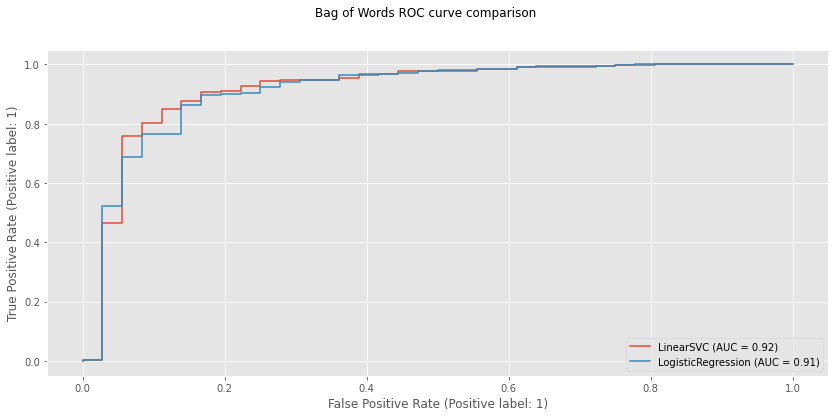

<Figure size 288x576 with 0 Axes>

In [703]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm


clf_model_all_new.fit(X_train_bagofwords, y_train_bagofwords)

clf_disp = metrics.plot_roc_curve(clf_model_all_new, X_test_bagofwords, y_test_bagofwords)  
log_disp = metrics.plot_roc_curve(lr_model_all_new, X_test_bagofwords, y_test_bagofwords, ax = clf_disp.ax_)  

clf_disp.figure_.suptitle("Bag of Words ROC curve comparison")
plt.figure(figsize=(4,8))
plt.show()

ROC Curve comparison shows that the area under curve for LR Classifier is less than SVC (0.92 vs 0.91). Looking at the f1-scores of these models, we can see that the LSVM model has a higher score than LR (98.09% vs 97.39%). So, by using f1-scores SVC has higher accuracy than LR.

In general, for imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

### 11. TF-IDF Model 

Bag-of-words are not the only way to featurize text. Another method is the **Term Frequency-Inverse Document Frequency (TF-IDF)** method. This method evaluates how important a word is to a document within a large collection of documents (i.e. corpus). The importance increases proportionally based on the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

The TF-IDF weight is the product of two terms. The first computes the normalized Term Frequency (TF); i.e. the number of times a word appears in a document divided by the total number of words in that document. The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**The TF-IDF metric solves this problem:**
- TF computes the classic number of times the word appears in the text.<br>
- IDF computes the relative importance of this word which depends on how many texts the word can be found.<br>

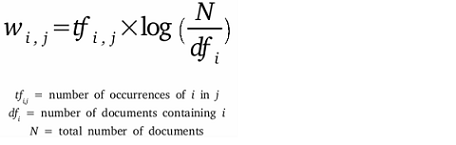

Now, we re-featurize our original set of reviews based on TF-IDF and split the resulting features into train and test sets.

In [704]:
# implementing tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(amazon_ProRev['lowercase_text_reviews'])
tfidf_data

<3804x7260 sparse matrix of type '<class 'numpy.float64'>'
	with 126356 stored elements in Compressed Sparse Row format>

Here we have the same number of features/columns as bag of words model since we were applying the same approach of counting times a logarithm value. 

### 11.1 Applying Logistic Regression to TF-IDF Features

In [705]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,amazon_ProRev['Sentiment_rating'],
                                                                            test_size = 0.3, random_state = 0)

Now, we test the model using the f1 score by applying Logistic Regression to the features created from TF-IDF.

In [706]:
# Setting up the model class
lr_model_tf_idf = LogisticRegression()

# Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

# Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

# Evaluating the model
#print("F1 score: ",f1_score(y_test_bagofwords, test_pred_lr_all))
print("f1 score: ",f1_score(y_test_tfidf, test_pred_lr_all))

f1 score:  0.9702434625788998


Comparing the f1 scores, using Linear Regression model for Bag of Words and TF-IDF features shows that this score for TF_IDF with the value of 97.02% is less than BOW with the value of 97.39%. Sometimes this happens and sometimes TF-IDF is a better approach, so we have to be aware of the context, because this is going to be very context dependent and we have to customize all of these approaches.

### 11.2 Applying Linear Support Vector Machine (SVM) to TF-IDF Features

In [707]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf_model_all_new = LinearSVC()
clf_model_all_new.fit(X_train_tfidf, y_train_tfidf)


LinearSVC()

In [708]:
test_pred_clf_all = clf_model_all_new.predict(X_test_tfidf)

print("f1 score: ", f1_score(y_test_tfidf,test_pred_clf_all))

f1 score:  0.9727520435967302


Comparing the f1 scores, using Linear Support Vector Machine model for Bag of Words and TF-IDF features also shows that this score for TF_IDF with the value of 97.27% is less than BOW with the value of 98.09%. 

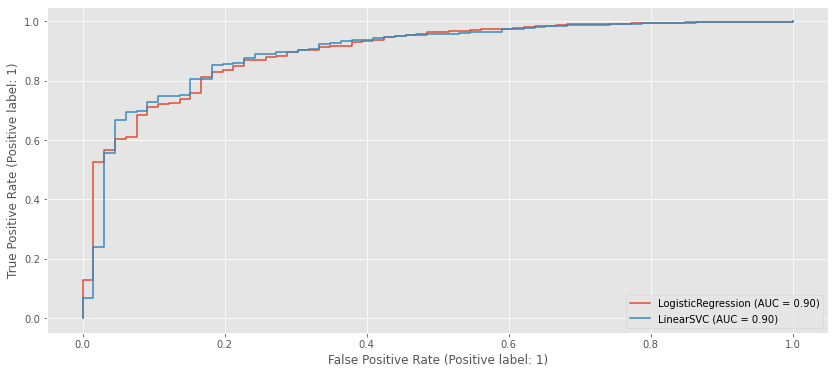

<Figure size 288x576 with 0 Axes>

In [710]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm
 _train_tfidf)

log_disp2 = metrics.plot_roc_curve(lr_model_all_new, X_test_tfidf, y_test_tfidf) 
clf_disp2 = metrics.plot_roc_curve(clf_model_all_new, X_test_tfidf, y_test_tfidf, ax = log_disp2.ax_)

clf_disp.figure_.suptitle("TF-IDF ROC curve comparison")
plt.figure(figsize=(4,8))
plt.show()

ROC Curve comparison shows that the area under curve for SVC Classifier is the same as LR classifier. By Looking at the f1-scores of these two models, we can see that the SVC model has a higher score than LR (97.28 vs 97.02). So, SVC has higher accuracy than LR.

### 12. Word Embeddings Model

Word embeddings is a type of word representation that allows words with similar meaning to have a similar representation. Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space.

In the following image, each of the words have been represented in 2-dimensions for simplicity. It can be clearly seen that words with similar context are grouped together.

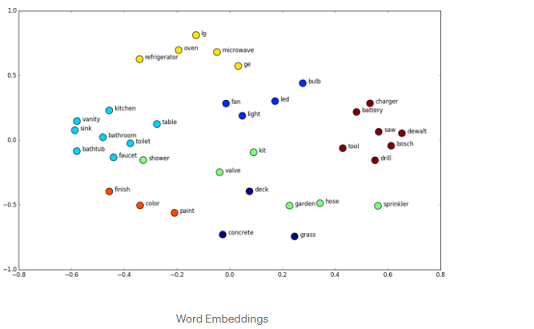

In [711]:
from IPython.display import Image
from IPython.core.display import HTML

Each word is represented by a real-valued vector, which generally has tens or hundreds of dimensions. This is in contrast to the thousands or millions of dimensions required for sparse word representations. Thus, word embeddings can drastically reduce the number of dimensions required for representing a text document.

In [712]:
# importing genism which is designed to handle large text collections using data streaming and incremental online algorithms
import gensim   # a topic-modelling and vector space modelling toolkit

We will be working with a pre-trained word2vec model from twitter (available at: https://drive.google.com/file/d/1GpHOJv3QXHcpTXfC0q-xwkPrVrjWeM1d/view).

In this notebook we are not going to execute FastText modeling because it's going to take a long time to finish, but we are going to use a pre-trained Twitter Glove pretrained model which contains a lot of words represented in a 200 dimension with space. So, both generate the exact same results. Basically we are loading the twitter glove pre-trained model which contains 200 features per word and we are going to use that model in order to transform our reviews to that 200 feature spaces. Here we show some examples. For example the word electronic has 200 feature representations. So, every word has 200 features and we might want to process those words in our reviews of Amazon.       

In [713]:
# Loading a pre-trained glove word embedding that is trained on twitter dataset 
# This word embedding is 200 dimensional in lenght (200 features per term)
# Source: https://nlp.stanford.edu/projects/glove/

model = gensim.models.KeyedVectors.load_word2vec_format(
    os.path.join(os.getcwd(),'Twitter_Glove_pretrained.txt'),
    binary=False,
    unicode_errors='ignore')

The following modeling reduces 5251 features to 200. To generate a model like the one we are importing, we can uncomment and execute the following commented code cell below and execute it. The computational expense might take more than 2h processing. 

In [714]:
#from gensim.models.fasttext import FastText
 
#Set values for various parameters
#feature_size = 200   # Word vector dimensionality  
#min_word_count = 1   # Minimum word count                        
#sample = 1e-3        # Downsample setting for frequent words
#iter = 5000          # Represents the number of epochs

#tokenized_corpus = [nltk.word_tokenize(doc) for doc in amazon_ProRev['lowercase_text_reviews']]
#ft_model = FastText(tokenized_corpus, vector_size=feature_size, min_count = min_word_count, sample=sample,epochs=5000)

#ft_model.save_model("model_filename.bin") # Saving the model
#model = fasttext.load_model("model_filename.bin") # Loading the model

#model=FastText.load_fasttext_format('model_filename.bin')

We had approximately 192317 distinct tokens for 1-gram features in the bag-of-words representation, yet will only have 200 dimensions in this word embedding. This is a huge difference! Moreover, word embeddings capture the context and semantics of the sentences since each word vector representation is itself based on its contextual meaning.
Below shows two vector representations for the two example words, "electronic" and "great". They have one dimensional vector and 200 feature representations. So, every word has 200 features and we process those words in the reviews of Amazon.

In [715]:
import tensorflow.keras as keras

#print("The embedding for kindle is", len(model['kindle']), "dimensional")
#model['electronic']

print("The embedding for kindle is", len(model['kindle']), "dimensional")
model['kindle']

The embedding for kindle is 200 dimensional


array([-1.1365   ,  0.086994 , -0.29101  ,  0.13337  , -0.017813 ,
       -0.1841   ,  0.023659 , -0.16733  ,  0.36171  ,  0.27444  ,
       -0.29041  ,  0.33764  , -0.8788   , -0.31846  , -0.4447   ,
       -0.37525  ,  0.37477  ,  0.24086  ,  0.58137  ,  0.4828   ,
        0.3792   , -0.78336  ,  0.41529  ,  0.1967   ,  0.19282  ,
        0.27406  ,  0.13427  , -0.15163  ,  0.32927  ,  0.069169 ,
        0.33653  ,  0.69619  , -0.0068047,  0.051091 ,  0.072521 ,
       -0.2512   ,  0.64716  , -0.35533  ,  0.26962  ,  0.047669 ,
        0.46697  ,  0.28112  , -0.71206  ,  0.008091 , -0.22127  ,
       -0.29619  , -0.28385  ,  0.16609  , -0.1694   , -0.16762  ,
       -0.71636  , -0.21745  , -1.6145   ,  0.20087  ,  0.58534  ,
        0.17644  ,  0.3522   , -0.80545  ,  0.18605  ,  0.28394  ,
        0.11314  , -0.38085  , -0.13622  ,  0.29189  , -0.32286  ,
        0.54839  ,  0.459    , -0.092517 ,  0.37509  , -0.20101  ,
       -0.28203  ,  0.46435  , -0.16606  , -0.66415  ,  0.3777

In [716]:
print("The embedding for great is", len(model['great']), "dimensional")
model['great']

The embedding for great is 200 dimensional


array([ 1.0751e-01,  1.5958e-01,  1.3332e-01,  1.6642e-01, -3.2737e-02,
        1.7592e-01,  7.2395e-01,  1.1713e-01, -3.5036e-01, -4.2937e-01,
       -4.0925e-01, -2.5761e-01, -1.0264e+00, -1.0014e-01,  5.5390e-02,
        2.0413e-01,  1.2807e-01, -2.6337e-02, -6.9719e-02, -3.6193e-02,
       -1.9917e-01,  3.9437e-02, -9.2358e-02,  2.6981e-01, -2.0951e-01,
        1.5455e+00, -2.8123e-01,  3.2046e-01,  4.5545e-01, -3.8841e-02,
       -1.7369e-01, -2.3251e-01, -5.9551e-02,  2.3250e-01,  4.4214e-01,
        3.3666e-01,  3.9352e-02, -1.2462e-01, -2.9317e-01, -4.8857e-02,
        6.9021e-01,  7.1279e-02,  1.0252e-01,  1.6122e-01, -2.3536e-01,
        6.2724e-02,  2.0222e-01,  5.0234e-02, -1.1611e-01,  2.8909e-02,
       -1.1109e-01, -5.0241e-02, -5.9063e-01, -8.8747e-02,  5.1444e-01,
       -1.3715e-01,  1.7194e-01, -8.3657e-02,  9.6333e-02, -9.7063e-02,
        3.4003e-03, -7.0180e-02, -5.9588e-01, -2.8264e-01,  1.2529e-01,
        2.4359e-01, -4.9082e-01, -4.2533e-02,  2.2158e-01, -2.14

To find the vector for an entire review, we get the vector for each word in the review separately and take a simple average.
Here we are joining that pre-trained model and that word presentation to our reviews, so we can have 200 features per observation per review. 

Now we calculate the vector for every single review in the dataset.

In [717]:
# List for adding each average rperesentation per observation
review_embeddings = []

# Review_average
Review_average = np.zeros(model.vector_size)

# For each review in the review's dataset
for each_review in amazon_ProRev['lowercase_text_reviews']:
     count_val = 0
     # For each word in the review
     for each_word in word_tokenize(each_review):     
        if(each_word.lower() in model):
            Review_average += model[each_word.lower()]
            count_val += 1
    
     review_embeddings.append(list(Review_average/count_val))

Let's convert the list of vector representations for each review into a DataFrame and split it into train and test sets.

In [718]:
# Converting to a DataFrame object
embedding_data = pd.DataFrame(review_embeddings)

# Filling null values
# Null values are the ones that the Twitter pre-trained model is not considering (few of them)
embedding_data = embedding_data.fillna(0)
embedding_data

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.171781,0.280982,0.027447,0.161216,0.058600,0.245936,0.404202,0.014055,-0.069028,-0.182563,...,-0.046765,0.022014,0.240575,-0.012065,-0.032218,-0.104050,0.111765,0.210682,-0.253304,-0.015064
1,0.263232,0.625941,-0.009719,0.351928,0.044062,0.777751,1.167693,-0.166119,-0.340320,-0.281904,...,-0.155125,0.111195,0.701369,-0.072399,-0.120763,-0.236904,0.336933,0.503639,-0.656968,0.023602
2,0.230841,0.292102,-0.010109,0.310229,-0.030532,0.455306,0.864292,-0.103644,-0.222353,-0.260561,...,-0.246803,0.081568,0.415033,-0.074330,-0.045787,-0.150703,0.220990,0.351121,-0.540862,-0.097054
3,0.598997,0.678623,0.056329,0.843472,-0.074449,1.114259,2.059598,-0.299328,-0.679647,-0.574911,...,-0.520355,0.082791,0.850409,-0.169849,0.095377,-0.416752,0.624420,0.749254,-1.114101,-0.194192
4,0.375867,0.433827,0.051393,0.638382,-0.050910,0.647300,1.338901,-0.172095,-0.387211,-0.360117,...,-0.323968,0.096034,0.538058,-0.100422,0.077427,-0.453423,0.269514,0.465129,-0.645417,-0.080890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,811.991704,1419.298328,417.095537,1221.202304,-364.264411,1503.477618,4211.175694,-672.749788,-557.911605,-1253.467539,...,-705.114754,-12.934915,984.266545,-365.159254,193.826833,-931.420858,1260.514975,1611.782799,-962.514926,70.725844
3800,406.042144,709.784049,208.526471,610.618671,-182.192334,751.866554,2105.848569,-336.539139,-278.959292,-626.823503,...,-352.564708,-6.514775,492.271302,-182.596382,96.945621,-465.757030,630.363093,806.163293,-481.367798,35.311485
3801,2300.783632,4022.225169,1181.499235,3460.279545,-1032.715042,4260.825898,11933.911941,-1907.222939,-1580.681998,-3552.260073,...,-1997.763087,-36.987766,2789.808304,-1034.789838,549.565724,-2639.453861,3572.225908,4568.473324,-2727.738094,200.032871
3802,184.110977,321.989694,94.424399,276.962000,-82.731172,340.983537,955.292815,-152.632367,-126.483091,-284.283115,...,-159.897921,-2.960803,223.219522,-82.925096,44.001425,-211.312706,285.914487,365.685911,-218.281637,16.079316


In [719]:
embedding_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [720]:
embedding_data.shape

(3804, 200)

In [721]:
embedding_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Columns: 200 entries, 0 to 199
dtypes: float64(200)
memory usage: 5.8 MB


Now we can implement a classifier for the model. 

### 12.1 Applying Logistic Regression to Word Embedding Features


In [727]:
X_train_embed, X_test_embed, y_train_embed, y_test_embed = train_test_split(embedding_data, 
                                                                         amazon_ProRev['Sentiment_rating'], 
                                                                         test_size = 0.2,
                                                                         random_state = 0)

In [729]:
X_train_embed

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2673,323.531997,605.111107,191.836714,530.669015,-185.413955,656.958029,1773.769671,-288.381256,-249.337957,-578.824709,...,-304.258443,0.042894,451.596534,-133.786345,77.617958,-375.970936,565.444821,685.083569,-452.692942,31.076170
1549,226.332951,433.380840,110.678391,334.849416,-131.565841,426.632027,1219.928838,-213.931569,-171.170112,-361.329549,...,-194.264046,-0.391452,321.104409,-104.321982,67.713942,-249.131527,366.692309,464.051946,-286.382633,14.525135
3772,132.713673,231.963425,68.755305,200.008838,-59.731765,246.563202,688.899401,-110.213373,-91.513920,-205.617702,...,-115.548848,-2.044512,161.016381,-59.633787,31.593945,-152.203253,206.812005,263.851646,-157.981918,11.575498
2729,319.684975,597.512884,192.063767,530.363009,-184.185899,651.591570,1758.893046,-283.844632,-245.703667,-572.522186,...,-301.335337,0.758796,443.396215,-132.265497,74.941466,-373.553248,559.824303,679.778815,-449.067106,32.227386
548,87.795112,131.610546,39.897306,139.580400,-40.735739,161.305996,400.569250,-86.973667,-73.943744,-116.492284,...,-81.121110,30.401582,110.239961,-12.416444,22.517521,-89.359811,112.151458,159.030039,-102.190529,-19.888000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,217.608608,373.553672,122.925607,350.812242,-106.732354,429.612062,1106.667081,-199.907240,-169.924016,-345.182630,...,-194.506519,39.264924,305.744928,-64.149291,48.117198,-244.261556,342.032365,423.903671,-276.967936,-20.237345
3264,106.590650,191.421799,60.083709,167.596796,-54.046059,207.130609,565.657838,-91.088393,-76.487172,-175.589842,...,-96.038358,-1.001547,136.527437,-45.845529,24.082291,-123.233374,174.012492,218.276971,-136.888098,10.479167
1653,210.745336,410.156668,101.198130,316.472471,-127.212435,401.068254,1151.437317,-202.933869,-162.652538,-341.908327,...,-186.613759,-0.700054,302.114402,-97.315076,62.903766,-232.543036,344.518929,436.162285,-267.164956,16.594103
2607,25.574538,47.992997,15.007500,41.388483,-14.626243,51.549508,140.000083,-22.878698,-19.775231,-45.568758,...,-23.918792,0.016514,35.991889,-10.702594,6.104916,-29.652224,44.761979,53.783441,-35.479185,2.264670


In [734]:
from numpy import inf  # substitues all infite values of a numpy array with the maximum float64 number
y_train_embed[y_train_embed == inf] = np.finfo(np.float64).max

In [735]:
np.all(np.isfinite(y_train_embed))

True

Applying logistic regression to our word embeddings representation.

In [736]:
lr_model_all.fit(X_train_embed, y_train_embed)
test_pred_lr_all = lr_model_all.predict(X_test_embed)

print("f1 score: ",f1_score(y_test_embed, test_pred_lr_all))

f1 score:  0.9757738896366084


As we see the f1 score here is lower than the scores for BOW and TF_IDF using the Logistic Regression method, but we have to note that we're reducing 7260 features to 200 which is a lot of reduction in the feature space which affects on the model performance. In contrast the computational expenses are going to greatly decrease. In general the approach that we follow in this notebook is to build a model based on the features and then we do the prediction using other reviews and predict the sentiment of the user. So, if another review will be posted we can predict with a 97.58% of f1 score what its sentiment is, if it's positive or negative against the product.

### 12.2 Applying Linear Support Vector Machine to Word Embeddings (SVM) Features  

In [737]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf_model_all_new = LinearSVC(C= 20)
clf_model_all_new.fit(X_train_embed, y_train_embed)

LinearSVC(C=20)

In [738]:
test_pred_clf_all = clf_model_all_new.predict(X_test_embed)

print("f1 score: ", f1_score(y_test_embed,test_pred_clf_all))

f1 score:  0.9494809688581314


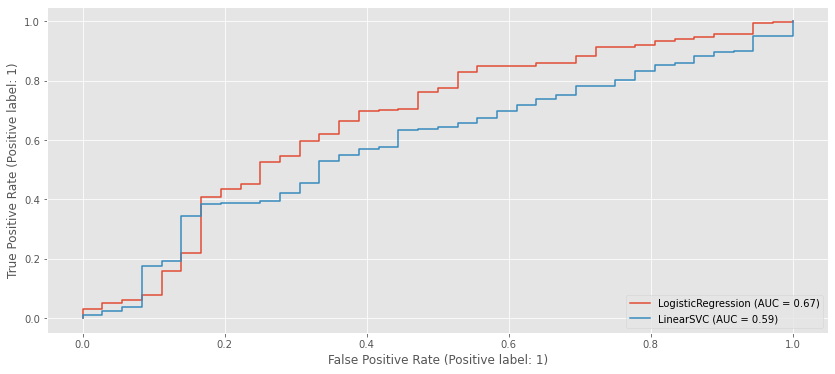

<Figure size 288x576 with 0 Axes>

In [739]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm


lr_model_all_new.fit(X_train_embed, y_train_embed)

log_disp2 = metrics.plot_roc_curve(lr_model_all_new, X_test_embed, y_test_embed) 
clf_disp2 = metrics.plot_roc_curve(clf_model_all_new, X_test_embed, y_test_embed, ax = log_disp2.ax_)

clf_disp.figure_.suptitle("Word Embeddings ROC curve comparison")
plt.figure(figsize=(4,8))
plt.show()

ROC Curve comparison shows that the area under curve for LR Classifier is bigger than SVM (0.67 vs 0.59) and as result it has higher performance.Looking at the f1-scores of these models, we can see that the LSVM model has a less score than LR (94.95% vs 97.58%). So, by using f1-scores SVC has higher accuracy than LR.

### 13. References

- [1]:  https://www.youtube.com/watch?v=6WpnxmmkYys
- [2]:  https://www.guru99.com/nltk-tutorial.html
- [3]:  https://www.sas.com/en_us/insights/analytics/what-is-natural-language-processing-nlp.html
- [4]:  https://medium.com/@qempsil0914/machine-learning-nlp-text-classification-with-amazon-review-data-using-python3-step-by-step-3fb0cc0cecc1
- [5]:  https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
- [6]:  https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
- [7]:  https://aws.amazon.com/blogs/machine-learning/detect-sentiment-from-customer-reviews-using-amazon-comprehend/
- [8]:  https://nycdatascience.com/blog/student-works/sentiment-analysis-and-prediction-amazon/